In [346]:
from keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.applications import ResNet50,VGG19
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense,Flatten,Dropout,Input
from keras.callbacks import ModelCheckpoint
import math


In [348]:
data_dir = './Datasets/car/DamagedOrNot/train'

datagen = ImageDataGenerator(preprocessing_function=keras.applications.resnet.preprocess_input,
                             rescale=1./255, brightness_range=[0.5, 1.5], zoom_range=[0.8, 1.2], validation_split=0.2)
# datagen = ImageDataGenerator(
#     rescale=1./255, brightness_range=[0.5, 1.5], zoom_range=[0.8, 1.2], validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)
print(train_generator.class_indices)


Found 1472 images belonging to 2 classes.
Found 368 images belonging to 2 classes.
{'damaged': 0, 'not': 1}


In [350]:
# model = VGG16(include_top=False, weights='imagenet')
# nb_train_samples = len(train_generator.filenames)
# bottleneck_features_train = model.predict(
#     train_generator, int(math.ceil(nb_train_samples / 16)))
# np.save('./Models/VGG16_bottleneck_features_train.npy', bottleneck_features_train)
# nb_validation_samples = len(test_generator.filenames)

# predict_size_validation = int(
#     math.ceil(nb_validation_samples / 16))

# bottleneck_features_validation = model.predict(
#     test_generator, predict_size_validation)

# np.save('./Models/VGG16_bottleneck_features_validation.npy',
#         bottleneck_features_validation)


In [351]:
num_classes = len(train_generator.class_indices)

input_layer = Input(shape=(256,256,3),name='Input_Layer')
model = ResNet50(include_top=False, weights='imagenet',input_tensor=input_layer)
flatten=Flatten(data_format='channels_last',name='Flatten')(model.output)
L1 = Dense(units=512,activation='relu',name='FC1')(flatten)
L2 = Dense(units=256,activation='relu',name='FC2')(L1)
dropout1 = Dropout(0.5)(L2)
out=Dense(num_classes, activation='sigmoid')(dropout1)
model = Model(inputs=input_layer,outputs=out)

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.00001, momentum=0.9),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [352]:
checkpoint = ModelCheckpoint(filepath='./Models/bestModels/ResNet50', monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')
history = model.fit(train_generator,
                    epochs=10,
                    batch_size=16,
                    validation_data=test_generator,callbacks=[checkpoint])

Epoch 1/10
92/92 [==============================] - ETA: 0s - loss: 0.9203 - accuracy: 0.6664
Epoch 1: val_accuracy improved from -inf to 0.48641, saving model to ./Models/bestModels\ResNet50


INFO:tensorflow:Assets written to: ./Models/bestModels\ResNet50\assets


INFO:tensorflow:Assets written to: ./Models/bestModels\ResNet50\assets


92/92 [==============================] - 43s 419ms/step - loss: 0.9203 - accuracy: 0.6664 - val_loss: 0.7533 - val_accuracy: 0.4864
Epoch 2/10
92/92 [==============================] - ETA: 0s - loss: 0.5307 - accuracy: 0.7887
Epoch 2: val_accuracy improved from 0.48641 to 0.51087, saving model to ./Models/bestModels\ResNet50


INFO:tensorflow:Assets written to: ./Models/bestModels\ResNet50\assets


INFO:tensorflow:Assets written to: ./Models/bestModels\ResNet50\assets


92/92 [==============================] - 38s 414ms/step - loss: 0.5307 - accuracy: 0.7887 - val_loss: 0.7532 - val_accuracy: 0.5109
Epoch 3/10
92/92 [==============================] - ETA: 0s - loss: 0.4073 - accuracy: 0.8431
Epoch 3: val_accuracy did not improve from 0.51087
92/92 [==============================] - 23s 241ms/step - loss: 0.4073 - accuracy: 0.8431 - val_loss: 0.8576 - val_accuracy: 0.4837
Epoch 4/10
92/92 [==============================] - ETA: 0s - loss: 0.3441 - accuracy: 0.8682
Epoch 4: val_accuracy did not improve from 0.51087
92/92 [==============================] - 23s 243ms/step - loss: 0.3441 - accuracy: 0.8682 - val_loss: 0.8939 - val_accuracy: 0.5027
Epoch 5/10
92/92 [==============================] - ETA: 0s - loss: 0.3052 - accuracy: 0.8770
Epoch 5: val_accuracy improved from 0.51087 to 0.54891, saving model to ./Models/bestModels\ResNet50


INFO:tensorflow:Assets written to: ./Models/bestModels\ResNet50\assets


INFO:tensorflow:Assets written to: ./Models/bestModels\ResNet50\assets


92/92 [==============================] - 38s 414ms/step - loss: 0.3052 - accuracy: 0.8770 - val_loss: 1.0196 - val_accuracy: 0.5489
Epoch 6/10
92/92 [==============================] - ETA: 0s - loss: 0.2625 - accuracy: 0.8886
Epoch 6: val_accuracy improved from 0.54891 to 0.67120, saving model to ./Models/bestModels\ResNet50


INFO:tensorflow:Assets written to: ./Models/bestModels\ResNet50\assets


INFO:tensorflow:Assets written to: ./Models/bestModels\ResNet50\assets


92/92 [==============================] - 39s 424ms/step - loss: 0.2625 - accuracy: 0.8886 - val_loss: 0.7102 - val_accuracy: 0.6712
Epoch 7/10
92/92 [==============================] - ETA: 0s - loss: 0.2369 - accuracy: 0.9049
Epoch 7: val_accuracy improved from 0.67120 to 0.73913, saving model to ./Models/bestModels\ResNet50


INFO:tensorflow:Assets written to: ./Models/bestModels\ResNet50\assets


INFO:tensorflow:Assets written to: ./Models/bestModels\ResNet50\assets


92/92 [==============================] - 39s 419ms/step - loss: 0.2369 - accuracy: 0.9049 - val_loss: 0.6078 - val_accuracy: 0.7391
Epoch 8/10
92/92 [==============================] - ETA: 0s - loss: 0.1954 - accuracy: 0.9239
Epoch 8: val_accuracy improved from 0.73913 to 0.84783, saving model to ./Models/bestModels\ResNet50


INFO:tensorflow:Assets written to: ./Models/bestModels\ResNet50\assets


INFO:tensorflow:Assets written to: ./Models/bestModels\ResNet50\assets


92/92 [==============================] - 39s 419ms/step - loss: 0.1954 - accuracy: 0.9239 - val_loss: 0.3091 - val_accuracy: 0.8478
Epoch 9/10
92/92 [==============================] - ETA: 0s - loss: 0.1976 - accuracy: 0.9151
Epoch 9: val_accuracy improved from 0.84783 to 0.88859, saving model to ./Models/bestModels\ResNet50


INFO:tensorflow:Assets written to: ./Models/bestModels\ResNet50\assets


INFO:tensorflow:Assets written to: ./Models/bestModels\ResNet50\assets


92/92 [==============================] - 39s 423ms/step - loss: 0.1976 - accuracy: 0.9151 - val_loss: 0.2612 - val_accuracy: 0.8886
Epoch 10/10
92/92 [==============================] - ETA: 0s - loss: 0.1984 - accuracy: 0.9151
Epoch 10: val_accuracy improved from 0.88859 to 0.91033, saving model to ./Models/bestModels\ResNet50


INFO:tensorflow:Assets written to: ./Models/bestModels\ResNet50\assets


INFO:tensorflow:Assets written to: ./Models/bestModels\ResNet50\assets


92/92 [==============================] - 39s 423ms/step - loss: 0.1984 - accuracy: 0.9151 - val_loss: 0.2067 - val_accuracy: 0.9103


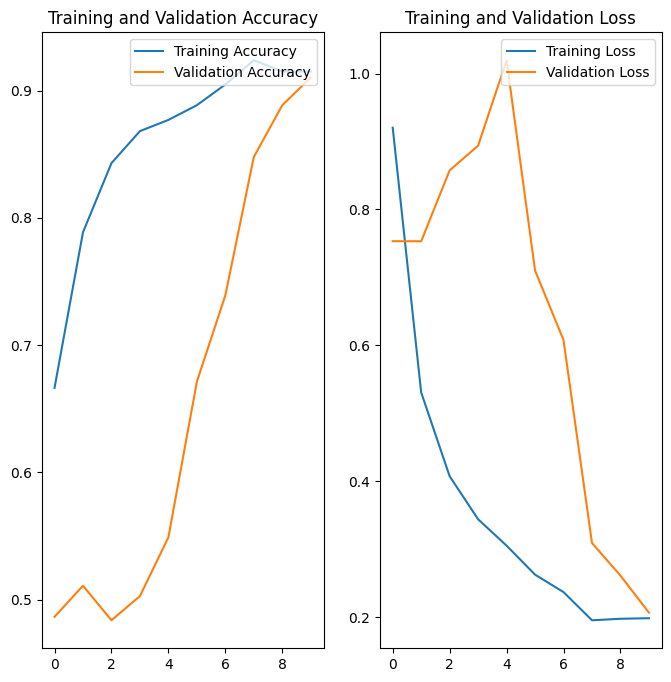

In [353]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.epoch))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()